In [ ]:
!pip install -q scikit-learn imbalanced-learn joblib xgboost seaborn matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/synthetic_fraud_datasets.csv",
                 sep=",",
                 quotechar='"',
                 engine="python",
                 on_bad_lines="skip")


In [ ]:

# 2. Basic Info
print(df.info())
print(df.isnull().sum())

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction_Amount             12000 non-null  float64
 1   Account_Balance                12000 non-null  float64
 2   Previous_Fraudulent_Activity   12000 non-null  int64  
 3   Daily_Transaction_Count        12000 non-null  int64  
 4   Avg_Transaction_Amount_7d      12000 non-null  float64
 5   Failed_Transaction_Count_7d    12000 non-null  int64  
 6   Card_Age                       12000 non-null  int64  
 7   Transaction_Distance           12000 non-null  float64
 8   Risk_Score                     12000 non-null  float64
 9   Is_Weekend                     12000 non-null  int64  
 10  Transaction_Type_Online        12000 non-null  int64  
 11  Transaction_Type_POS           12000 non-null  int64  
 12  Device_Type_Mobile             12000 non-null 

In [ ]:

# Assume 'fraud' or 'isFraud' is the target column
target_col = 'fraud' if 'fraud' in df.columns else 'isFraud'

print(df.columns.tolist())


['Transaction_Amount', 'Account_Balance', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Age', 'Transaction_Distance', 'Risk_Score', 'Is_Weekend', 'Transaction_Type_Online', 'Transaction_Type_POS', 'Device_Type_Mobile', 'Device_Type_Tablet', 'Merchant_Category_Electronics', 'Merchant_Category_Grocery', 'Merchant_Category_Restaurants', 'Merchant_Category_Travel', 'Card_Type_Debit', 'Card_Type_Prepaid', 'Authentication_Method_OTP', 'Authentication_Method_PIN', 'Fraud_Label']


In [ ]:
# Target column
target_col = "Fraud_Label"
5
# Features and target
X = df.drop(columns=[target_col])
y = df[target_col]


In [ ]:
df = df.dropna(subset=["Fraud_Label"])   # remove rows with NaN in target

In [ ]:
print(y.isnull().sum())
print(y.value_counts(dropna=False))


0
Fraud_Label
0    8000
1    4000
Name: count, dtype: int64


In [ ]:
X = df.drop(columns=["Fraud_Label"])
y = df["Fraud_Label"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numeric columns:", numeric_cols.tolist())

Categorical columns: []
Numeric columns: ['Transaction_Amount', 'Account_Balance', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Age', 'Transaction_Distance', 'Risk_Score', 'Is_Weekend', 'Transaction_Type_Online', 'Transaction_Type_POS', 'Device_Type_Mobile', 'Device_Type_Tablet', 'Merchant_Category_Electronics', 'Merchant_Category_Grocery', 'Merchant_Category_Restaurants', 'Merchant_Category_Travel', 'Card_Type_Debit', 'Card_Type_Prepaid', 'Authentication_Method_OTP', 'Authentication_Method_PIN']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [ ]:
# # Fit the preprocessor on training data and transform full dataset
# X_processed = preprocessor.fit_transform(X)

# # Get the feature names after preprocessing
# cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
# all_features = np.concatenate([numeric_cols, cat_features])

# # Convert to DataFrame
# X_processed_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
#                               columns=all_features)

# # Add back the target column
# final_df = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

# # View sample
# print(final_df.head())

# # Save to CSV
# final_df.to_csv("preprocessed_fraud_dataset.csv", index=False)
# print("✅ Preprocessed dataset saved as 'preprocessed_fraud_dataset.csv'")


In [ ]:
# 8. Logistic Regression Pipeline
log_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_pipe.fit(X_train, y_train)
y_pred_log = log_pipe.predict(X_test)

print("\n🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1600
           1       0.67      0.29      0.40       800

    accuracy                           0.71      2400
   macro avg       0.70      0.61      0.61      2400
weighted avg       0.70      0.71      0.68      2400

Accuracy: 0.715


In [ ]:
log_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_pipe.fit(X_train, y_train)
y_pred_log = log_pipe.predict(X_test)

print("\n🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))



🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1600
           1       0.67      0.29      0.40       800

    accuracy                           0.71      2400
   macro avg       0.70      0.61      0.61      2400
weighted avg       0.70      0.71      0.68      2400

Accuracy: 0.715


In [ ]:
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

print("\n🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1600
           1       0.90      0.76      0.82       800

    accuracy                           0.89      2400
   macro avg       0.90      0.86      0.87      2400
weighted avg       0.89      0.89      0.89      2400

Accuracy: 0.8925


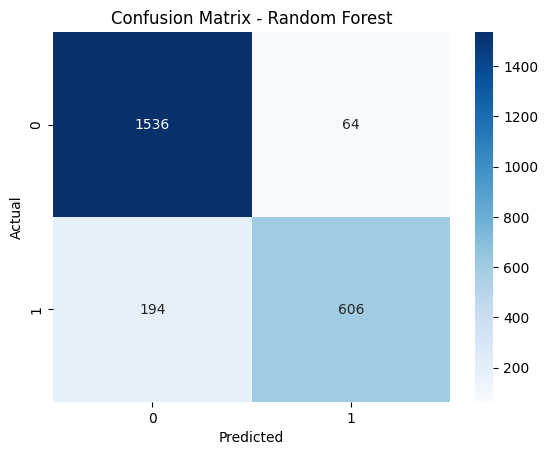

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Choose the best (say Random Forest performed best)
joblib.dump(rf_pipe, "fraud_model.joblib")
print("✅ Saved model as fraud_model.joblib")


✅ Saved model as fraud_model.joblib


In [ ]:
from google.colab import files
files.download("fraud_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

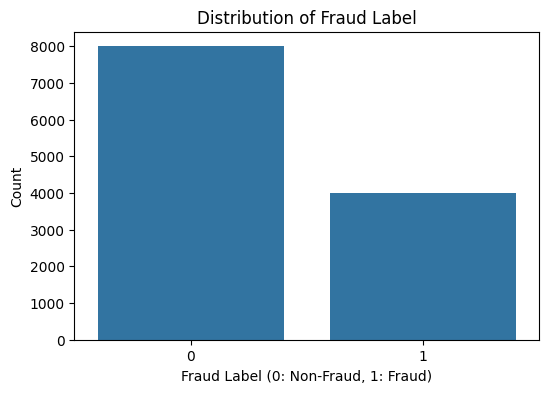

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_Label', data=df)
plt.title('Distribution of Fraud Label')
plt.xlabel('Fraud Label (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


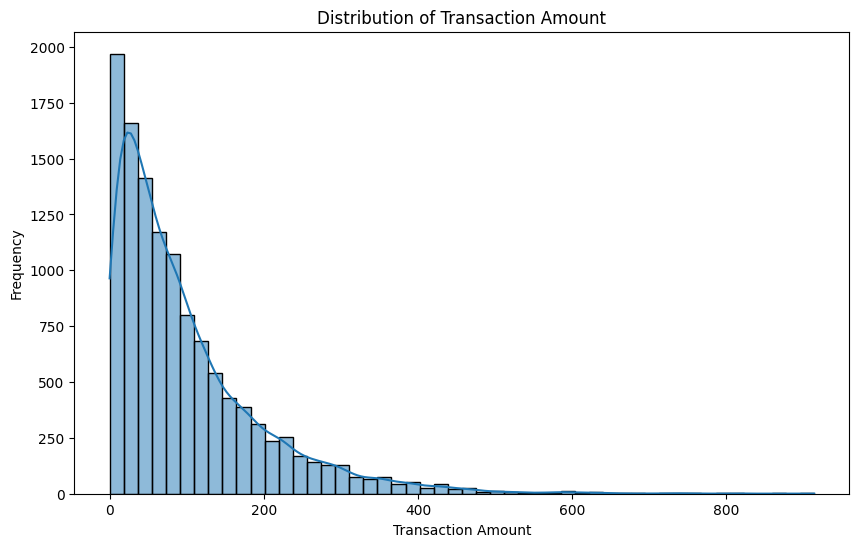

In [ ]:

# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

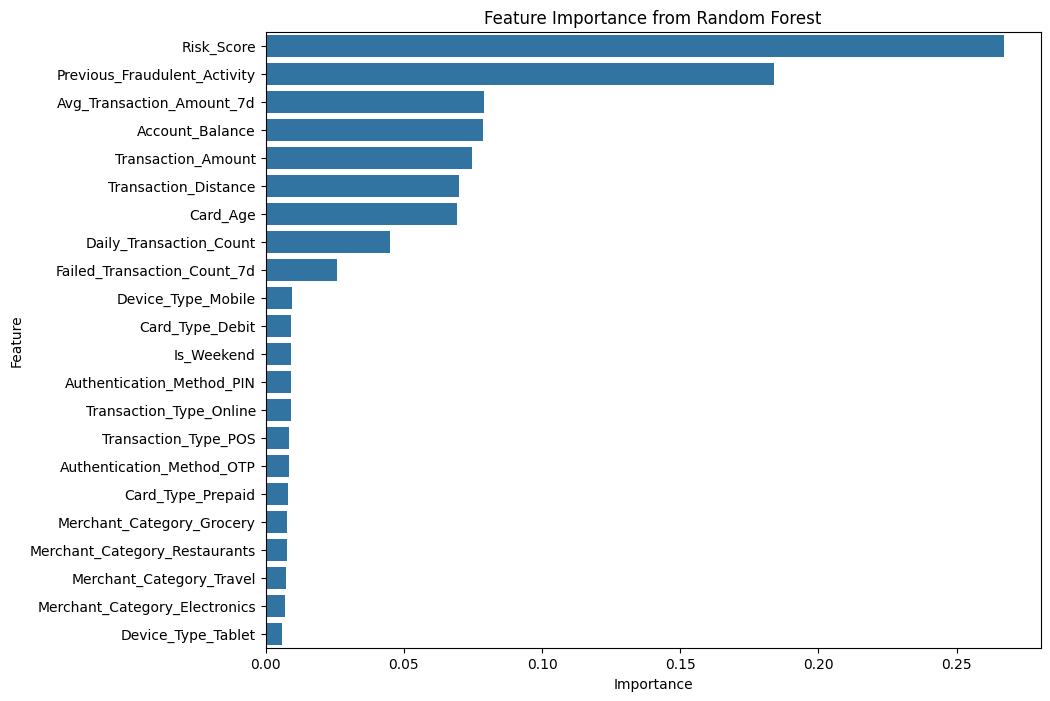

In [ ]:
# Get feature importance from the Random Forest model
feature_importances = rf_pipe.named_steps['classifier'].feature_importances_

# Get the feature names after preprocessing
# The preprocessor is fitted on the training data (X_train) which has the original column names.
# So we can use X_train.columns directly.
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()